# Principles of Data Science: Coursework

## Table of Contents

### 1. Introduction

> <b>1.1. Research Questions </b> <br>
> <b>1.2. Importing Libraries</b> <br>
> <b>1.3. Analytical Provenance</b> <br>
> <b>1.4. Importing Dataset</b> <br>


### 2. Basic Preparation

> <b>2.1. Removing Columns </b> <br>
> <b>2.2. Segmenting Feature Space</b> <br>
> <b>2.3. Duplicate Columns</b> <br>
> <b>2.4. Separating Companies by Industry/Sector</b> <br>


### 3. Financial Companies

> <b>3.1. Data Preparation & Exploration </b> <br>
> > <b>3.1.1. Missing Value Treatment </b> <br>
> <b>3.1.2. Target Variable Analysis </b> <br>


> <b>3.2. Research Question 1 </b> <br>
> > <b>3.2.1. Feature Selection </b> <br>
> <b>3.2.2. Model Building </b> <br>
> <b>3.2.3. Findings </b> 

> <b>3.3. Research Question 2 </b> <br>
> > <b>3.3.1. Investigating Relationships </b> <br>
> <b>3.3.2. Investigating Effect Size </b> <br>
> <b>3.3.3. Findings </b> 




### 4. Healthcare Companies

> <b>4.1. Data Preparation & Exploration </b> <br>
> > <b>4.1.1. Missing Value Treatment </b> <br>
> <b>4.1.2. Target Variable Analysis </b> <br>


> <b>4.2. Research Question 1 </b> <br>
> > <b>4.2.1. Feature Selection </b> <br>
> <b>4.2.2. Model Building </b> <br>
> <b>4.2.3. Findings </b>

> <b>4.3. Research Question 2 </b> <br>
> > <b>4.3.1. Investigating Relationships </b> <br>
> <b>4.3.2. Investigating Effect Size </b> <br>
> <b>4.3.3. Findings </b>





## 1. Introduction

The goal of this research is to examine the key factors determining a company's performance - as measured by Earnings per Share (EPS). We will then examine the impact that EPS has on a company's share price. This Notebook will walk the reader through the analysis process. We will start right at the beginning, with tentative research questions - and continually refine and answer these questions as we proceed.

<b>1.1. Research Questions</b>

Research questions will be recorded in a dictionary. This will help keep in mind the goal of the analysis while also observing the refinements made.

In [1]:
rq = {}

Our first tentative research questions are given by:

* <b>Research Question 1: </b>What are the key factors determining EPS for companies in the US stock market?
* <b>Research Question 2: </b>To what extent does EPS determine price?

In [2]:
rq["RQ11"] = "What are the key factors determining EPS for companies in the US stock market?"
rq["RQ21"] = "To what extent does EPS determine price?"

<b>1.2. Importing libraries</b>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

<b>1.3. Analytical Provenance</b>

There will be several changes made to the data. These will be recorded in a dictionary.

In [4]:
df_history = {}

<b>1.4. Importing dataset</b>

In [5]:
df = pd.read_csv("2018_Financial_Data.csv")

In [6]:
# Update history
df_history["df"] = "Original dataset"

In [7]:
df.shape

(4392, 225)

In [8]:
df.head()

Unnamed: 0       Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
0      CMCSA  9.450700e+10          0.1115     0.000000e+00  9.450700e+10   
1        KMI  1.414400e+10          0.0320     7.288000e+09  6.856000e+09   
2       INTC  7.084800e+10          0.1289     2.711100e+10  4.373700e+10   
3         MU  3.039100e+10          0.4955     1.250000e+10  1.789100e+10   
4         GE  1.216150e+11          0.0285     9.546100e+10  2.615400e+10   

   R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
0  0.000000e+00  6.482200e+10        7.549800e+10      1.900900e+10   
1  0.000000e+00  6.010000e+08        3.062000e+09      3.794000e+09   
2  1.354300e+10  6.750000e+09        2.042100e+10      2.331600e+10   
3  2.141000e+09  8.130000e+08        2.897000e+09      1.499400e+10   
4  0.000000e+00  1.811100e+10        4.071100e+10     -1.455700e+10   

   Interest Expense  ...  Receivables growth  Inventory Growth  Asset Growth  \
0      3.542000e+09  ...              0.2570            0.0000        0.3426   
1      1.917000e+09  ...              0.0345           -0.0920       -0.0024   
2     -1.260000e+08  ...              0.1989            0.0387        0.0382   
3      3.420000e+08  ...              0.4573            0.1511        0.2275   
4      5.059000e+09  ...             -0.2781           -0.2892       -0.1575   

   Book Value per Share Growth  Debt Growth  R&D Expense Growth  \
0                       0.0722       0.7309              0.0000   
1                       0.0076      -0.0137              0.0000   
2                       0.1014      -0.0169              0.0390   
3                       0.6395      -0.5841              0.1738   
4                      -0.4487      -0.2297              0.0000   

   SG&A Expenses Growth             Sector  2019 PRICE VAR [%]  Class  
0                0.1308  Consumer Cyclical           32.794573      1  
1               -0.1265             Energy           40.588068      1  
2               -0.0942         Technology           30.295514      1  
3                0.0942         Technology           64.213737      1  
4                0.0308        Industrials           44.757840      1  

[5 rows x 225 columns]

## 2. Basic Preparation

<b>2.1. Removing Columns</b>

The 'Unnamed: 0' column will be dropped. It contains the stock tickers (abbreviations) for the companies in the database. This will not be informative for analysis. One of the target variables will also be renamed to make coding simpler.

In [9]:
df = df.drop("Unnamed: 0", axis = 1)

In [10]:
# Renaming target column 
df = df.rename(columns = {"2019 PRICE VAR [%]": "Price_Var"})

<b>2.2. Segmenting Feature Space</b>

Observing the dimensionality of the dataset in <b>1.4</b> shows that there are 225 variables. With such high dimenstionality, just figuring out where to start can be a problem! Incorporation of domain knowledge allows us to segment the feature space into the following categories:

* <b>Balance Sheet: </b>Which can be further segmented into <b>assets</b>, <b>liabilities</b> and <b>equity</b>
* <b>Income Statement: </b>Which can be further segmented into <b>income</b> and <b>expenses</b>
* <b>Cash Flow Statement</b>
* <b>Ratios</b>
* <b>Per Share Statistics</b>
* <b>Growth Statistics</b>
* <b>Other</b>

This segmentation is done below.

In [11]:
# Balance sheet
balance_sheet = ["Cash and cash equivalents", "Short-term investments", "Cash and short-term investments",
             "Receivables", "Inventories","Total current assets", "Property, Plant & Equipment Net", "Goodwill and Intangible Assets",
                "Long-term investments", "Tax assets","Total debt", "Total non-current assets", "Total assets", "Payables", "Short-term debt",
                "Total current liabilities", "Long-term debt", "Deferred revenue", "Tax Liabilities", "Deposit Liabilities", "Total non-current liabilities",
                "Total liabilities", "Other comprehensive income", "Retained earnings (deficit)", "Total shareholders equity", 
                "Investments", "Net Debt", "Other Assets", "Other Liabilities", "Depreciation & Amortization", "Tangible Asset Value", "Net Current Asset Value"]

In [12]:
# Assets
assets = ["Cash and cash equivalents", "Short-term investments", "Cash and short-term investments",
             "Receivables", "Inventories","Total current assets", "Property, Plant & Equipment Net", "Goodwill and Intangible Assets",
                "Long-term investments", "Tax assets", "Total non-current assets", "Total assets",
         "Investments", "Other Assets", "Tangible Asset Value", "Net Current Asset Value"]

In [13]:
# Liabilities
liabilities = ["Total debt", "Payables", "Short-term debt",
                "Total current liabilities", "Long-term debt", "Deferred revenue", "Tax Liabilities", "Deposit Liabilities", "Total non-current liabilities",
                "Total liabilities", "Other Liabilities", "Depreciation & Amortization", "Net Debt"]

In [14]:
# Equity
equity = ["Other comprehensive income", "Retained earnings (deficit)", "Total shareholders equity",'Acquisitions and disposals', 'Weighted Average Shs Out', 'Weighted Average Shs Out (Dil)']

In [15]:
# Income Statement 
income_statement = ["Revenue", "Cost of Revenue", "Gross Profit", "R&D Expenses", "SG&A Expense", "Operating Expenses",
                   "Operating Income", "Interest Expense", "Earnings before Tax", "Income Tax Expense", "Net Income - Non-Controlling int",
                   "Net Income - Discontinued ops", "Net Income", "Preferred Dividends", "Net Income Com", "EPS", "EPS Diluted", "EBITDA", 
                   "EBIT", "Consolidated Income", "Stock-based compensation"]

In [16]:
# Income
income = ["Revenue", "Gross Profit", "R&D Expenses", "SG&A Expense", "Operating Expenses", "Operating Income",
         "Earnings before Tax", "Net Income - Non-Controlling int",
                   "Net Income - Discontinued ops", "Net Income", "Preferred Dividends", "Net Income Com", "EPS", "EPS Diluted", "EBITDA", 
                   "EBIT", "Consolidated Income", "Stock-based compensation"]

In [17]:
# Expenses
expenses = ["Cost of Revenue", "Interest Expense", "Income Tax Expense"]

In [18]:
# Cash flow Statement
cash_flows = ["Operating Cash Flow", "Capital Expenditure", "Investment purchases and sales", "Investing Cash flow",
             "Issuance (repayment) of debt", "Issuance (buybacks) of shares", "Dividend payments", "Financing Cash Flow",
             "Effect of forex changes on cash", "Net cash flow / Change in cash", "Free Cash Flow", "Net Cash/Marketcap"]

In [19]:
# Ratios
ratios = ["Revenue Growth", "Gross Margin", "EBITDA Margin", "EBIT Margin", "Profit Margin", "Free Cash Flow margin", 
         "Earnings Before Tax Margin", "Net Profit Margin", "priceBookValueRatio", "priceToBookRatio", "priceToSalesRatio",
         "priceEarningsRatio", "priceToFreeCashFlowsRatio", "priceToOperatingCashFlowsRatio", "priceCashFlowRatio", "priceEarningsToGrowthRatio",
         "priceSalesRatio", "enterpriseValueMultiple", "priceFairValue", "ebitperRevenue", "ebtperEBIT", "niperEBT", "grossProfitMargin",
         "operatingProfitMargin", "pretaxProfitMargin", "netProfitMargin", "nIperEBT", "eBTperEBIT", "eBITperRevenue", "payablesTurnover",
         "inventoryTurnover", "fixedAssetTurnover", "assetTurnover", "currentRatio", "quickRatio", "cashRatio", "debtRatio", "debtEquityRatio",
         "longtermDebtToCapitalization","totalDebtToCapitalization", "cashFlowToDebtRatio", "companyEquityMultiplier", "operatingCashFlowPerShare", "freeCashFlowPerShare",
         "cashPerShare", "payoutRatio", "operatingCashFlowSalesRatio", "freeCashFlowOperatingCashFlowRatio", "cashFlowCoverageRatios",
         "shortTermCoverageRatios", "capitalExpenditureCoverageRatios", "dividendpaidAndCapexCoverageRatios", "dividendPayoutRatio", "PE ratio", "Price to Sales Ratio",
         "POCF ratio", "PFCF ratio", "PB ratio", "PTB ratio", "EV to Sales", "Enterprise Value over EBITDA", "EV to Operating cash flow", "EV to Free cash flow",
         "Debt to Equity", "Debt to Assets", "Net Debt to EBITDA", "Current ratio", "Interest Coverage", "Income Quality", "Dividend Yield", "Payout Ratio", "SG&A to Revenue",
         "R&D to Revenue", "Intangibles to Total Assets", "Capex to Operating Cash Flow", "Capex to Revenue", "Capex to Depreciation", "Stock-based compensation to Revenue", "Capex per Share", "dividendYield"]

In [20]:
# Per share
per_share = ["Dividend per Share", "Revenue per Share", "Net Income per Share", "Operating Cash Flow per Share", "Free Cash Flow per Share",
            "Cash per Share", "Book Value per Share", "Tangible Book Value per Share", "Shareholders Equity per Share", "Interest Debt per Share",
            "10Y Revenue Growth (per Share)", "5Y Revenue Growth (per Share)", "3Y Revenue Growth (per Share)", "10Y Operating CF Growth (per Share)",
            "5Y Operating CF Growth (per Share)", "3Y Operating CF Growth (per Share)", "10Y Net Income Growth (per Share)","5Y Net Income Growth (per Share)",
            "3Y Net Income Growth (per Share)", "10Y Shareholders Equity Growth (per Share)", "5Y Shareholders Equity Growth (per Share)", "3Y Shareholders Equity Growth (per Share)",
            "10Y Dividend per Share Growth (per Share)", "5Y Dividend per Share Growth (per Share)", "3Y Dividend per Share Growth (per Share)"]

In [21]:
# Growth statistics
growth = ["SG&A Expenses Growth", "R&D Expense Growth", "Debt Growth", "Book Value per Share Growth", "Asset Growth",
         "Inventory Growth", "Receivables growth", "Free Cash Flow growth", "Operating Cash Flow growth", "Dividends per Share Growth",
         "Weighted Average Shares Diluted Growth", "Weighted Average Shares Growth", "EPS Diluted Growth", "EPS Growth",
         "Net Income Growth", "Operating Income Growth", "EBIT Growth", "Gross Profit Growth"]

In [22]:
# Other
other = ["Market Cap", "Enterprise Value", "Earnings Yield", "Free Cash Flow Yield", "Graham Number", "Return on Tangible Assets",
        "Graham Net-Net", "Working Capital", "Invested Capital", "Average Receivables", "Average Payables", "Average Inventory",
        "Days Sales Outstanding", "Days Payables Outstanding", "Days of Inventory on Hand", "Receivables Turnover", 
        "Payables Turnover", "Inventory Turnover", "Dividend Yield", "effectiveTaxRate", "daysOfSalesOutstanding", "daysOfInventoryOutstanding",
        "operatingCycle", "daysOfPayablesOutstanding", "cashConversionCycle", "interestCoverage", "returnOnAssets", "returnOnEquity",
        "returnOnCapitalEmployed", "ROIC", "ROE","Sector"]

In [23]:
# Ensuring that no features have been missed
len(other) + len(growth) + len(per_share) + len(ratios) + len(cash_flows) + len(income) + len(expenses) + len(assets) + len(liabilities) + len(equity)

223

While tedious, this task has brought to light the following:

* <b>Duplicate Columns: </b>There exists numerous duplicate columns in the data. For example, the variables "ROE" and "returnOnEquity".
* <b>Sectors: </b>This variable corresponds to the industry a company belongs to. This can be used to segment companies further.

<b>2.3. Duplicate Columns</b>

To understand the problem with the duplicate columns, we will use the example of "ROE" and "returnOnEquity".

In [24]:
(df["ROE"] == df["returnOnEquity"]).sum()/df.shape[0]

0.941712204007286

These columns are not exact replicas. In order to deal with this, we use the function created below. This function will find all pairs of duplicate columns and return the first element of these pairs. Columns corresponding to these first elements will then be dropped from the dataset.

In [25]:
def duplicate_feature_finder(data_frame, cutoff):
    
    cols = data_frame.columns.tolist()
    
    duplicate_cols = []
    
    no_rows = data_frame.shape[0]
    
    x = []
    
    for col_1 in cols:
        
        x.append(col_1)
        
        for col_2 in cols:
            
            if col_1 != col_2:
            
                if not col_2 in x:

                    similarity = (data_frame[col_1] == data_frame[col_2]).sum()/no_rows

                    if similarity > cutoff:

                        duplicate_cols.append(col_1)
                    
    duplicate_cols = set(duplicate_cols)
    duplicate_cols = list(duplicate_cols)
    
    return duplicate_cols

In [26]:
col_dup = duplicate_feature_finder(df, 0.5)

There exist certain features that are important to the analysis. We will ensure that none of these features are deleted.

In [27]:
essential_col = ["EPS", "Net Income", "Cash and cash equivalents", "Class", "Price_Var"]

In [28]:
duplicate_cols = [x for x in col_dup if x not in essential_col]

In [29]:
len(duplicate_cols)

38

In [30]:
# Dropping duplicate columns
df2 = df.drop(duplicate_cols, axis = 1)
df_history["df2"] = "Dataframe with duplicate columns dropped"

In [31]:
df2.shape

(4392, 186)

Given that we have removed duplicate features, the segments created in <b>2.2</b> will need to be updated.

In [32]:
# Updating segments
assets2 = [x for x in assets if not x in duplicate_cols]
liabilities2 = [x for x in liabilities if not x in duplicate_cols]
equity2 = [x for x in equity if not x in duplicate_cols]
income2 = [x for x in income if not x in duplicate_cols]
expenses2 = [x for x in expenses if not x in duplicate_cols]
cash_flows2 = [x for x in cash_flows if not x in duplicate_cols]
ratios2 = [x for x in ratios if not x in duplicate_cols]
per_share2 = [x for x in per_share if not x in duplicate_cols]
growth2 = [x for x in growth if not x in duplicate_cols]
other2 = [x for x in other if not x in duplicate_cols]

In [33]:
# Ensuring that no features have been missed
len(other2) + len(growth2) + len(per_share2) + len(ratios2) + len(cash_flows2) + len(income2) + len(expenses2) + len(assets2) + len(liabilities2) + len(equity2)

185

<b>2.4. Separating companies by Industry/Sector</b>

One of the benefits of feature segmentation was discovering the "Sector" variable. This corresponds to the industry that a company belongs to.

In [34]:
df2["Sector"].value_counts()

Financial Services        824
Healthcare                691
Technology                636
Industrials               574
Consumer Cyclical         506
Basic Materials           276
Real Estate               255
Energy                    248
Consumer Defensive        191
Utilities                 102
Communication Services     89
Name: Sector, dtype: int64

To limit the scope of this research, we will focus our attention on the two most populated industries:

* <b>Financial Services</b>
* <b>Healthcare</b>

While the scope could be further reduced to just one industry, keeping two will enable more in-depth analysis and facilitate comparison between the sectors. Given the limited scope, we need to update our first research questions.

In [35]:
rq["RQ12"] = "What are the key factors determining EPS for financial and healthcare companies in the US stock market?"

We will now create separate dataframes corresponding to each sector.

In [36]:
# Selecting financial companies from dataframe and updating history
fin = df2.query("Sector == 'Financial Services'")
df_history["fin"] = "Dataframe with financial companies"

In [37]:
# Selecting healthcare companies from dataframe and updating history
health = df2.query("Sector == 'Healthcare'")
df_history["health"] = "Dataframe with healthcare companies"

Now that we have managed make our research more specific, we can continue our analysis by sector/industry.

## 3.  Financial Companies

### 3.1. Data Preparation and Exploration

The name of the dataframe containing all financial companies is <b>fin</b>.

In [38]:
fin.shape

(824, 186)

In [39]:
fin.head()

Revenue  Revenue Growth  Cost of Revenue  Gross Profit  SG&A Expense  \
5   9.124700e+10          0.0446     0.000000e+00  9.124700e+10  5.338100e+10   
16  8.466400e+10         -0.0139     0.000000e+00  8.466400e+10  3.835600e+10   
17  4.738900e+10         -0.0430     3.116600e+10  1.622300e+10  1.468800e+10   
19  7.285400e+10          0.0057     7.568000e+09  6.528600e+10  4.184100e+10   
21  4.010700e+10          0.0570     0.000000e+00  4.010700e+10  2.399500e+10   

    Operating Expenses  Operating Income  Interest Expense  \
5         5.338100e+10      3.786600e+10      0.000000e+00   
16        5.612600e+10      2.853800e+10      0.000000e+00   
17        1.465000e+10      1.573000e+09      1.309000e+09   
19        4.184100e+10      2.344500e+10      0.000000e+00   
21        2.887000e+10      1.123700e+10      0.000000e+00   

    Earnings before Tax  Income Tax Expense  ...  Receivables growth  \
5          3.458400e+10        6.437000e+09  ...              0.0680   
16         2.805500e+10        5.662000e+09  ...              0.0000   
17         1.480000e+08        1.540000e+08  ...              0.0745   
19         2.340200e+10        5.357000e+09  ...             -0.0764   
21         1.109800e+10        2.350000e+09  ...             -0.0514   

    Inventory Growth  Asset Growth  Book Value per Share Growth  Debt Growth  \
5                0.0        0.0321                       0.0029      -0.0008   
16               0.0       -0.0286                      -0.0195       0.0200   
17               0.0       -0.0127                      -0.1042       0.0917   
19               0.0        0.0407                       0.0579       0.0107   
21               0.0        0.0021                       0.0806      -0.0232   

    R&D Expense Growth  SG&A Expenses Growth              Sector  Price_Var  \
5                  0.0               -0.0249  Financial Services  44.315988   
16                 0.0               -0.0026  Financial Services  19.216212   
17                 0.0                0.0965  Financial Services  32.872803   
19                 0.0               -0.0093  Financial Services  53.486482   
21                 0.0                0.0404  Financial Services  30.210967   

    Class  
5       1  
16      1  
17      1  
19      1  
21      1  

[5 rows x 186 columns]

In [40]:
# Dropping unnecessary variables
fin = fin.drop("Sector", axis = 1)

<b>3.1.1. Missing Value Treatment</b>

Missing values will be treated as follows:

* Features with more than 20% missing values will be dropped 
* Remaining missing values will be imputed using KNN imputation

In [41]:
# Dropping features with more than 20% missing values
threshold = 0.8 * fin.shape[0]
fin2 = fin.dropna(thresh = threshold, axis = 1)

In [42]:
# Updating history
df_history["fin2"] = "Financial dataframe with missing values dropped"

In [43]:
# Imputing remaining missing values using KNN imputation
imputer = KNNImputer()
imputer.fit(fin2)

fin3 = pd.DataFrame(imputer.transform(fin2), columns = fin2.columns)
df_history["fin3"] = "Financial dataframe - with no missing values"

In [44]:
fin3.shape

(824, 141)

Let us appreciate what has been done here. With just a few simple computational steps, we have reduced our variable space from 225 to 141! We will now have to update the segments created in <b>2.2</b>.

In [45]:
# Updating segments
fin3_cols = fin3.columns.tolist()

fin_assets = [x for x in fin3_cols if x in assets2]
fin_liabilities = [x for x in fin3_cols if x in liabilities2]
fin_equity = [x for x in fin3_cols if x in equity2]
fin_income = [x for x in fin3_cols if x in income2]
fin_expenses = [x for x in fin3_cols if x in expenses2]
fin_cash_flows = [x for x in fin3_cols if x in cash_flows2]
fin_ratios = [x for x in fin3_cols if x in ratios2]
fin_per_share = [x for x in fin3_cols if x in per_share2]
fin_growth = [x for x in fin3_cols if x in growth2]
fin_other = [x for x in fin3_cols if x in other2]

In [46]:
len(fin_assets) + len(fin_liabilities) + len(fin_equity) + len(fin_income) + len(fin_expenses) + len(fin_cash_flows) + len(fin_ratios) + len(fin_per_share) + len(fin_growth) + len(fin_other)

140

<b>3.1.2. Target Variable Analysis</b>

There are three target variables of interest for this study. These are:

* <b>Class: </b>1 indicating stock price has increased over the recorded year, 0 for decrease
* <b>Price_Var: </b>Percentage change in price over the recorded year
* <b>EPS: </b>Earnings per share of the company

Outlier treatment for these variables will include case deletion. Given that these are the target variables we will not use imputation as this may significantly skew results. There are only a few outliers that we will see making information loss from deleted rows minimal.

<b>Class</b>

In [47]:
# Observing class distribution
fin3["Class"].value_counts()/fin3.shape[0]

1.0    0.85801
0.0    0.14199
Name: Class, dtype: float64

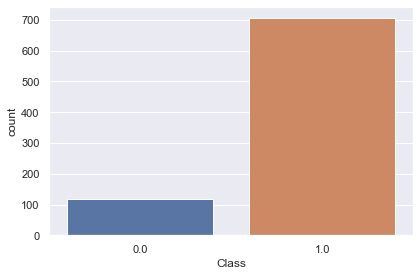

In [48]:
# Visualising distribution of class
sns.set_theme()
sns.countplot(data = fin3, x = "Class")
plt.tight_layout()
plt.show()

<b>Price_Var</b>

In [49]:
# Statistical summaries
fin3["Price_Var"].describe()

count    824.000000
mean      20.326654
std       26.649671
min      -94.899170
25%        8.633705
50%       19.957376
75%       31.463044
max      212.711883
Name: Price_Var, dtype: float64

The maximum and minimum values here do not raise concerns. There are instances where a company's stock price can triple or halve during the course of a year.

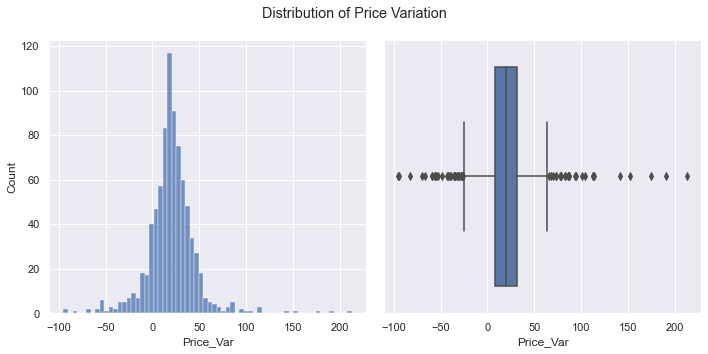

In [50]:
# Visualisations
fig, axes = plt.subplots(1,2,sharey = False, sharex = False, figsize = (10,5))
fig.suptitle("Distribution of Price Variation")

sns.histplot(ax = axes[0], data = fin3, x = "Price_Var")
sns.boxplot(ax = axes[1], data = fin3, x = "Price_Var")

plt.tight_layout()
plt.show()

<b>Earnings per Share (EPS)</b>

In [51]:
# Statistical summaries
fin3["EPS"].describe()

count     824.000000
mean        4.149844
std        63.481811
min       -41.760000
25%         0.430000
50%         1.460000
75%         2.772500
max      1820.749300
Name: EPS, dtype: float64

The maximum value here raises concerns. It is erroneous - EPS can never be so high - and will be dropped.

In [52]:
# Dropping erroneous EPS value
eps_max_idx = fin3["EPS"].idxmax()
fin4 = fin3.drop(eps_max_idx, axis = 0)

In [53]:
# Updating history
df_history["fin4"] = "Financial companies with extreme values dropped for target variable EPS"

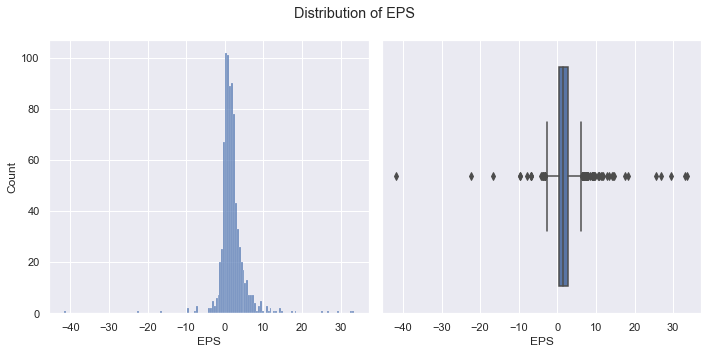

In [54]:
# Visualisations
fig, axes = plt.subplots(1,2,sharey = False, sharex = False, figsize = (10,5))
fig.suptitle("Distribution of EPS")

sns.histplot(ax = axes[0], data = fin4, x = "EPS")
sns.boxplot(ax = axes[1], data = fin4, x = "EPS")

plt.tight_layout()
plt.show()

The dataset is now ready to investigate our research questions.

### 3.2. Research Question 1

This question is given by:

In [55]:
rq["RQ12"]

'What are the key factors determining EPS for financial and healthcare companies in the US stock market?'

To answer this, the "Class" target variable will not be required and hence be dropped.

In [56]:
fin5 = fin4.drop("Class", axis = 1)
df_history["fin5"] = "Financial dataframe with Class dropped"

In [57]:
fin5.shape

(823, 140)

The method employed to answer this research question will involve examining the Spearman's rank correlation coefficient between members of the individual segments created in section <b>2.2</b> and EPS. This statistic is robust to outliers and will help select important features. If two features are collinear and exhibit a strong relationship to EPS, only one will be chosen. This feature selection will be done in <b>3.2.1</b>. Selected features will be used to create a random forest regressor to predict EPS.

A random forest utilizes the power of ensemble learning to make predictions. Using the sklearn ensemble library, we can evaluate model performance by looking at its score. For this library, models are scored using the R^2 measure. This indicates the percentage variance of the dependent variable that can be explained by the combination of independent variables fed to the model. Knowledge of this allows us to refine the research question even more.

The current research questions is given by:

In [58]:
rq["RQ12"]

'What are the key factors determining EPS for financial and healthcare companies in the US stock market?'

This will be refined to:

* <b>Research Question 1: </b>What are the primary determinants of earnings for financial and healthcare companies in the US stock market and to what extent do these factors determine Earnings per Share (EPS)?

In [59]:
rq["RQ13"] = "What are the primary determinants of earnings for financial and healthcare companies in the US stock market and to what extent do these factors determine Earnings per Share (EPS)?"

So, we will determine primary factors by examining the Spearman's rank correlation coefficient between features and EPS. Selected features will be fed into a random forest regressor model to predict EPS. The performance of this model can illustrate the extent to which they determine the target variable.

<b>3.2.1. Feature Selection</b>

<b>Assets</b>

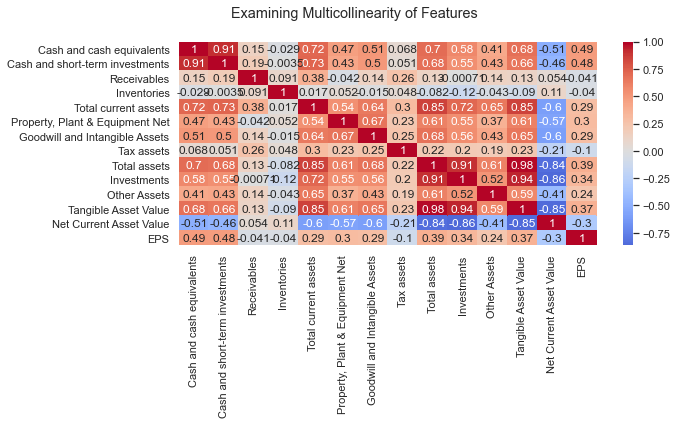

In [60]:
fin_assets.append("EPS")
M2_assets = fin5[fin_assets]
df_history["M2_assets"] = "Financial assets"

# Examining correlations between features - using spearman rank due to robustness to outliers
corr = M2_assets.corr(method = 'spearman')
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(corr, center = 0, cmap = "coolwarm", annot = True)
plt.suptitle("Examining Multicollinearity of Features")
plt.tight_layout()
plt.show()

The variables chosen are:

* <b>Cash and cash equivalents</b>
* <b>Total assets</b>

<b>Liabilities</b>

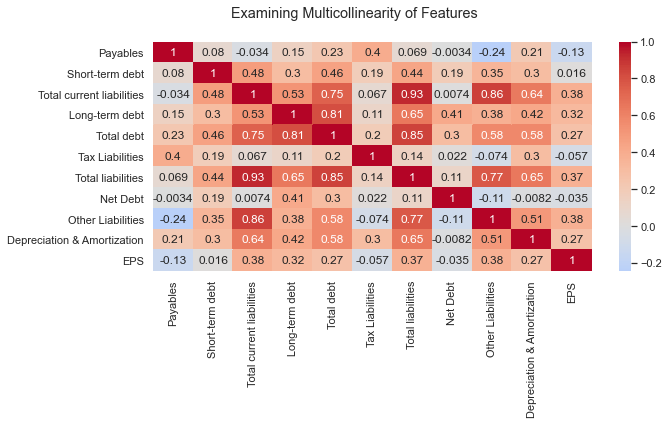

In [61]:
fin_liabilities.append("EPS")
M2_liabilities = fin5[fin_liabilities]
df_history["M2_liabilities"] = "Financial liabilities"

corr = M2_liabilities.corr(method = 'spearman')
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(corr, center = 0, cmap = "coolwarm", annot = True)
plt.suptitle("Examining Multicollinearity of Features")
plt.tight_layout()
plt.show()

Variable chosen is <b>Total liabilities</b>.

<b>Equity</b>

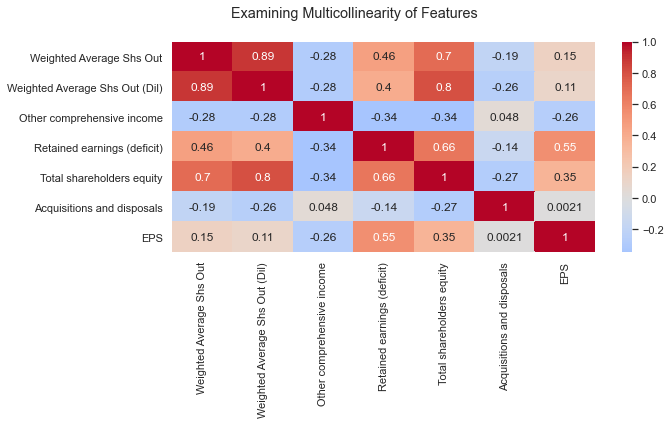

In [62]:
fin_equity.append("EPS")
M2_equity = fin5[fin_equity]
df_history["M2_equity"] = "Financial equity"

corr = M2_equity.corr(method = 'spearman')
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(corr, center = 0, cmap = "coolwarm", annot = True)
plt.suptitle("Examining Multicollinearity of Features")
plt.tight_layout()
plt.show()

Variable chosen is <b>Retained earnings (deficit)</b>.

<b>Income</b>

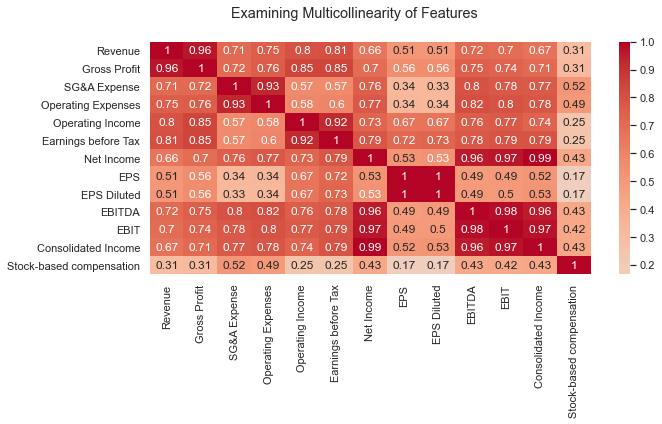

In [63]:
M2_income = fin5[fin_income]
df_history["M2_income"] = "Financial income"

corr = M2_income.corr(method = 'spearman')
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(corr, center = 0, cmap = "coolwarm", annot = True)
plt.suptitle("Examining Multicollinearity of Features")
plt.tight_layout()
plt.show()

Variable chosen is <b>Net Income</b>.

<b>Expense</b>

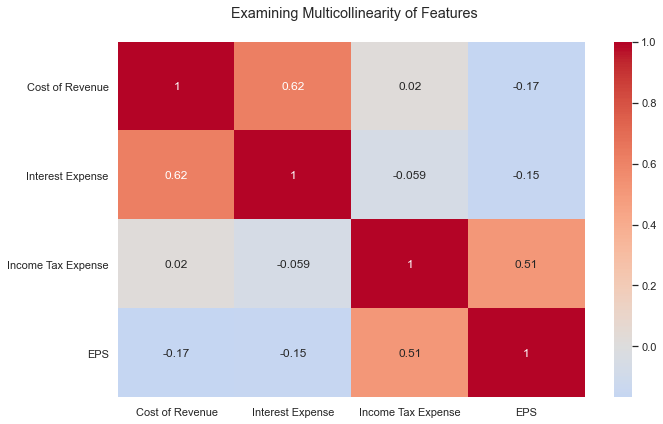

In [64]:
fin_expenses.append("EPS")
M2_expense = fin5[fin_expenses]
df_history["M2_expense"] = "Financial expenses"

corr = M2_expense.corr(method = 'spearman')
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(corr, center = 0, cmap = "coolwarm", annot = True)
plt.suptitle("Examining Multicollinearity of Features")
plt.tight_layout()
plt.show()

Variable chosen is <b>Income Tax Expense</b>.

<b>Cash Flows</b>

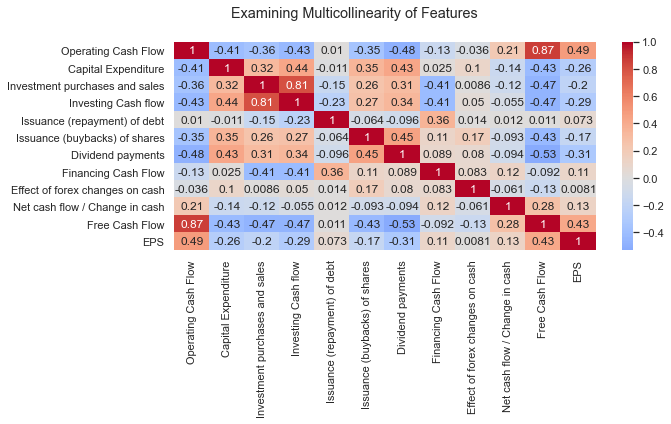

In [65]:
fin_cash_flows.append("EPS")
M2_cash_flow = fin5[fin_cash_flows]
df_history["M2_cash_flow"] = "Financial cash flows"

corr = M2_cash_flow.corr(method = 'spearman')
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(corr, center = 0, cmap = "coolwarm", annot = True)
plt.suptitle("Examining Multicollinearity of Features")
plt.tight_layout()
plt.show()

Variable chosen is <b>Operating Cash Flow</b>.

<b>Ratios</b>

In [66]:
len(fin_ratios)

41

The length of the fin_ratios segment is too long to create one heatmap. It will be divided into 4 segments.

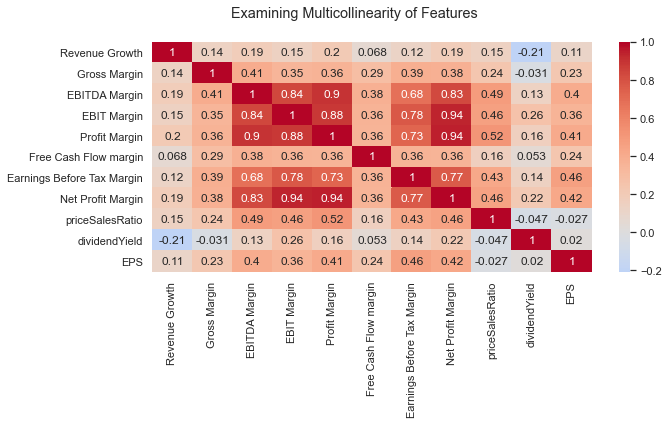

In [67]:
fin_ratios1 = fin_ratios[0:10]
fin_ratios1.append("EPS")

M2_ratios1 = fin5[fin_ratios1]
df_history["M2_ratios1"] = "Financial ratios 1"

corr = M2_ratios1.corr(method = 'spearman')
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(corr, center = 0, cmap = "coolwarm", annot = True)
plt.suptitle("Examining Multicollinearity of Features")
plt.tight_layout()
plt.show()

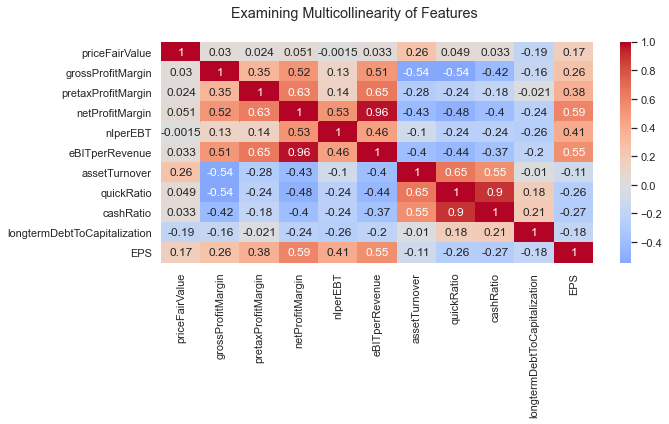

In [68]:
fin_ratios2 = fin_ratios[10:20]
fin_ratios2.append("EPS")

M2_ratios2 = fin5[fin_ratios2]
df_history["M2_ratios2"] = "Financial ratios 2"

corr = M2_ratios2.corr(method = 'spearman')
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(corr, center = 0, cmap = "coolwarm", annot = True)
plt.suptitle("Examining Multicollinearity of Features")
plt.tight_layout()
plt.show()

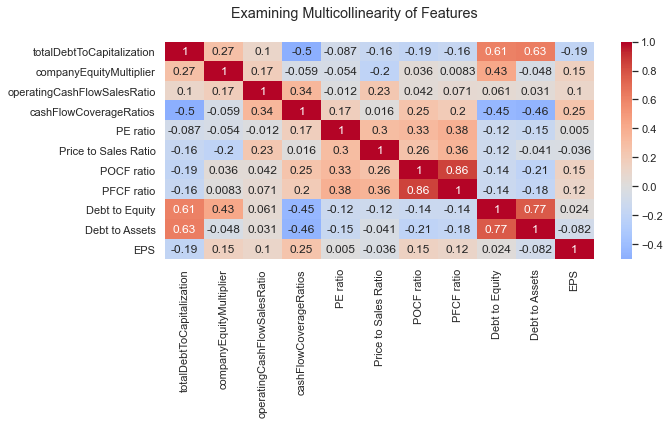

In [69]:
fin_ratios3 = fin_ratios[20:30]
fin_ratios3.append("EPS")

M2_ratios3 = fin5[fin_ratios3]
df_history["M2_ratios3"] = "Financial ratios 3"

corr = M2_ratios3.corr(method = 'spearman')
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(corr, center = 0, cmap = "coolwarm", annot = True)
plt.suptitle("Examining Multicollinearity of Features")
plt.tight_layout()
plt.show()

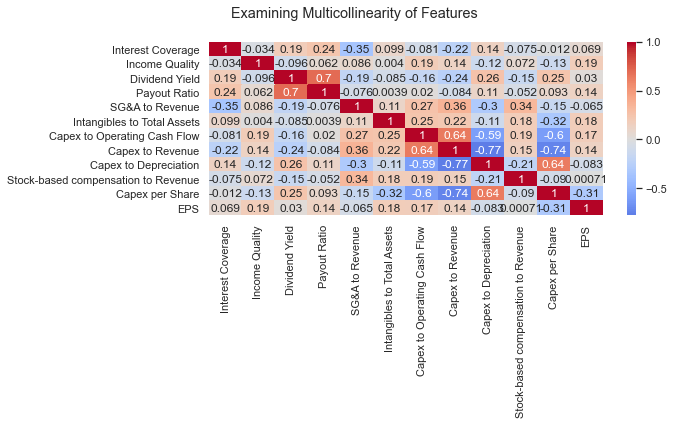

In [70]:
fin_ratios4 = fin_ratios[30:]
fin_ratios4.append("EPS")

M2_ratios4 = fin5[fin_ratios4]
df_history["M2_ratios4"] = "Financial ratios 4"

corr = M2_ratios4.corr(method = 'spearman')
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(corr, center = 0, cmap = "coolwarm", annot = True)
plt.suptitle("Examining Multicollinearity of Features")
plt.tight_layout()
plt.show()

Variables chosen are:

* <b>Earnings Before Tax Margin</b>
* <b>netProfitMargin</b>

<b>Per Share</b>

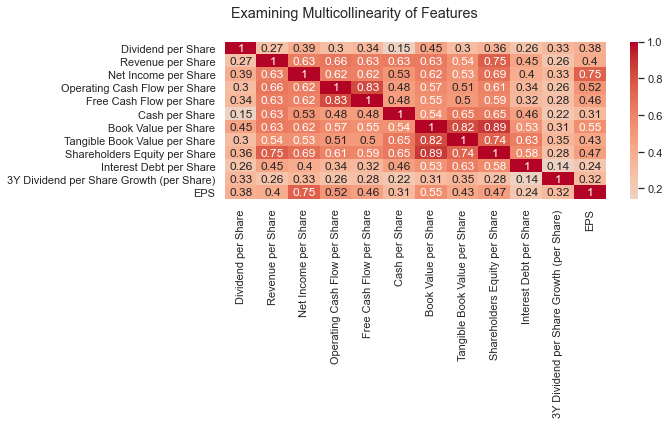

In [71]:
fin_per_share.append("EPS")
M2_per_share = fin5[fin_per_share]
df_history["M2_per_share"] = "Financial per share"

corr = M2_per_share.corr(method = 'spearman')
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(corr, center = 0, cmap = "coolwarm", annot = True)
plt.suptitle("Examining Multicollinearity of Features")
plt.tight_layout()
plt.show()

Variables chosen are:

* <b>Net Income per Share</b>
* <b>Book Value per Share</b>

<b>Growth</b>

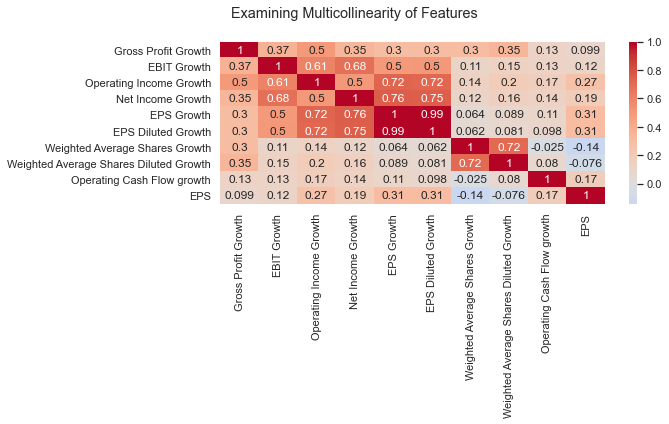

In [72]:
fin_growth1 = fin_growth[0:9]
fin_growth1.append("EPS")

M2_growth1 = fin5[fin_growth1]
df_history["M2_growth1"] = "Financial growth 1"

corr = M2_growth1.corr(method = 'spearman')
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(corr, center = 0, cmap = "coolwarm", annot = True)
plt.suptitle("Examining Multicollinearity of Features")
plt.tight_layout()
plt.show()

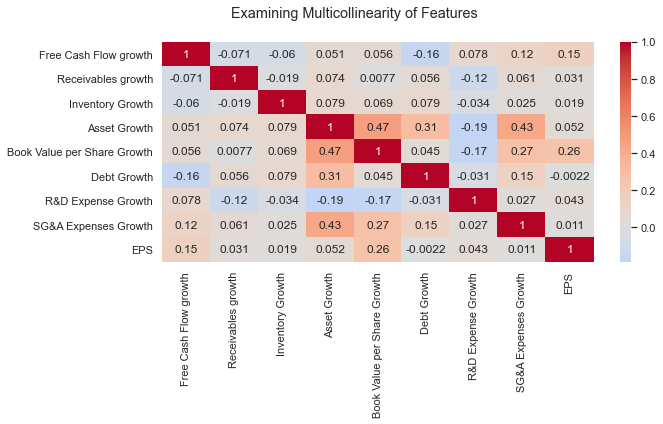

In [73]:
fin_growth2 = fin_growth[9:]
fin_growth2.append("EPS")

M2_growth2 = fin5[fin_growth2]
df_history["M2_growth2"] = "Financial growth 2"

corr = M2_growth2.corr(method = 'spearman')
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(corr, center = 0, cmap = "coolwarm", annot = True)
plt.suptitle("Examining Multicollinearity of Features")
plt.tight_layout()
plt.show()

<b>Other</b>

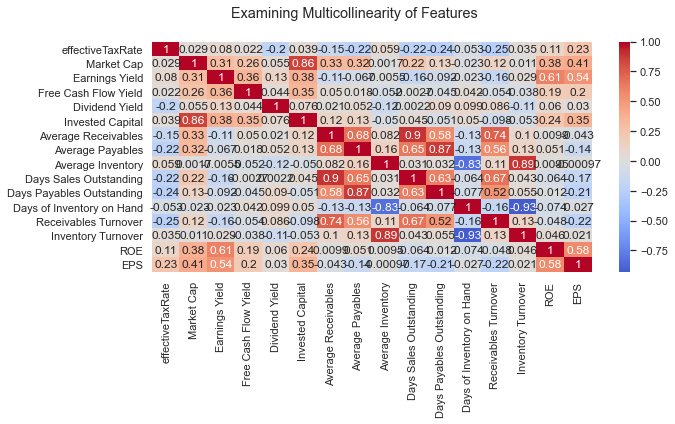

In [74]:
fin_other.append("EPS")
M2_other = fin5[fin_other]
df_history["M2_other"] = "Financial other"

corr = M2_other.corr(method = 'spearman')
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(corr, center = 0, cmap = "coolwarm", annot = True)
plt.suptitle("Examining Multicollinearity of Features")
plt.tight_layout()
plt.show()

Variables chosen are:

* <b>Earnings Yield</b>
* <b>ROE</b>

<b>Creating new dataframe with important features</b>

We will now collate the important features selected using the method above. We will examine the relationships between these features and remove highly correlated features to eliminate any issues with collinearity.

In [75]:
imp_features = ["Cash and cash equivalents", "Total assets", "Total liabilities", "Retained earnings (deficit)",
               "Net Income", "Income Tax Expense", "Operating Cash Flow", "Earnings Before Tax Margin",
               "netProfitMargin", "Net Income per Share", "Book Value per Share", "Earnings Yield", "ROE", "EPS"]

In [76]:
fin9 = fin5[imp_features]
df_history["fin9"] = "Financial dataframe with important features"

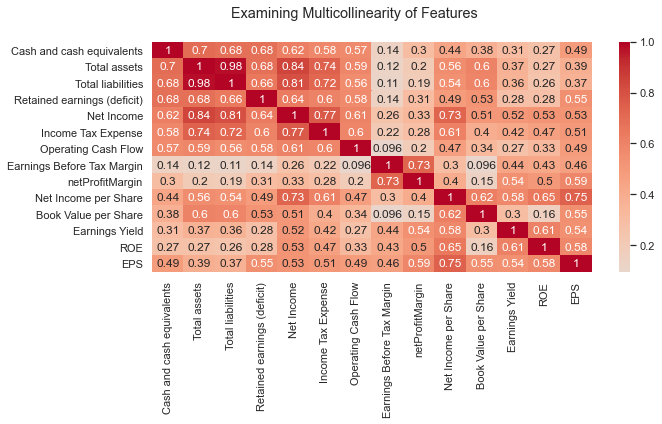

In [77]:
corr = fin9.corr(method = 'spearman')
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(corr, center = 0, cmap = "coolwarm", annot = True)
plt.suptitle("Examining Multicollinearity of Features")
plt.tight_layout()
plt.show()

<b>Subsetting Highly Collinear Features out</b>

In [78]:
imp_features2 = ["Net Income per Share", "netProfitMargin", "ROE", "Retained earnings (deficit)",
               "Book Value per Share", "Earnings Yield", "EPS"]

In [79]:
# Creating new dataframe without highly collinear features
fin10 = fin5[imp_features2]
df_history["fin10"] = "Financial dataframe without highly collinear features"

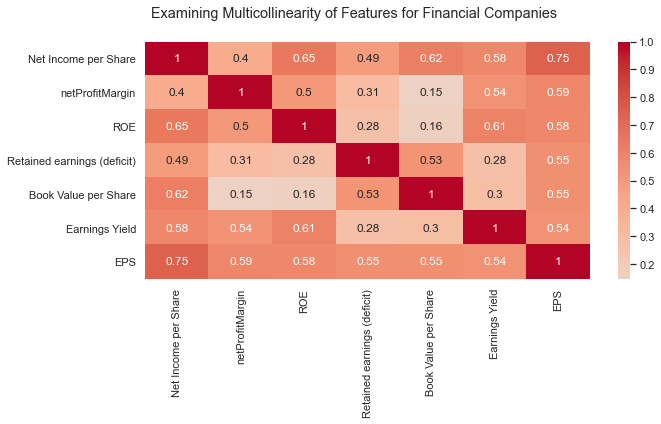

In [80]:
corr = fin10.corr(method = 'spearman')
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(corr, center = 0, cmap = "coolwarm", annot = True)
plt.suptitle("Examining Multicollinearity of Features for Financial Companies")
plt.tight_layout()
plt.show()

<b>3.2.2. Model Building</b>

<b>Building Random Forest Regressor</b>

Now that the important features have been selected, the random forest model can be constructed.

For model validation, cross-validation will be used to tune the number of estimators and maximum number of features. The maximum number of features determines the number of features to be considered at each split.

In [81]:
# Separating independent and dependent variables
X = fin10.drop("EPS", axis = 1)
y = fin10["EPS"]

#Separating training and test sets
X_train, X_test, y_train, y_test = train_test_split(pd.get_dummies(X), y, test_size = 0.3, random_state = 1)

#Build Model
rf = RandomForestRegressor(oob_score = True, random_state = 1)

#Grid Search
model = GridSearchCV(rf, param_grid = {"n_estimators": [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150], "max_features":[3]}, n_jobs = -1)
model.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(oob_score=True, random_state=1),
             n_jobs=-1,
             param_grid={'max_features': [3],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100, 110, 120, 130, 140, 150]})

In [82]:
best_model = model.best_estimator_
print(best_model.oob_score_)
print(best_model.score(X_test, y_test))

0.7405275490150799
0.5748007278153286


In [83]:
pd.Series(best_model.feature_importances_, index = X_test.columns).sort_values(ascending = False)

Net Income per Share           0.325603
Book Value per Share           0.299951
netProfitMargin                0.108962
Earnings Yield                 0.108798
ROE                            0.088429
Retained earnings (deficit)    0.068256
dtype: float64

<b>3.2.3. Findings</b>

We can combine model results with section <b>3.2.1</b> to answer our first research question partially with regards to financial companies.

Remember, this question is given by:

In [84]:
rq["RQ13"]

'What are the primary determinants of earnings for financial and healthcare companies in the US stock market and to what extent do these factors determine Earnings per Share (EPS)?'

<b>Primary determinants of EPS (for financial companies)</b>

Results from feature selection indicate that these components are given by:

* <b>Net Income per Share</b>
* <b>Net Profit Margin</b>
* <b>Return on Equity</b>
* <b>Retained earnings (deficit)</b>
* <b>Book value per Share</b>
* <b>Earnings Yield</b>

<b>To what extent do they determine EPS?</b>

Results from the model suggest that 57% of the variance in EPS can be explained by a combination of the features above. The question of causality now enters the picture. Observing the features above, we see that they are in some way related to earnings or income - suggesting that they do in fact have a causal impact on EPS.

### 3.3. Research Question 2

We can use the dataframe <b>fin4</b> to answer this research question.

In [85]:
rq["RQ21"]

'To what extent does EPS determine price?'

<b>3.3.1. Investigating Relationships</b>

To examine the relationship between the two, let's examine a scatterplot.

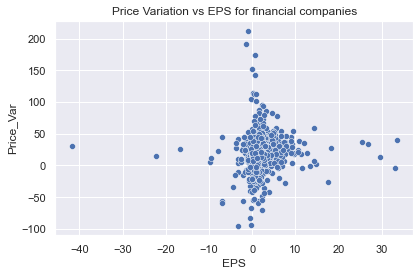

In [86]:
sns.scatterplot(data = fin4, y = "Price_Var", x = "EPS")
plt.title("Price Variation vs EPS for financial companies")
plt.tight_layout()
plt.show()

The results above show that there is no obvious relationship between Price Variation and EPS. This is great news! Why? Because now we can segment companies according to those whose prices have increased versus those whose haven't. This will prove very valuable. For example, a company whose stock price has decreased, but performance increased - as measured by EPS - can be purchased at a discounted rate.

With this new information, we can refine the second research question given by:

In [87]:
rq["RQ21"]

'To what extent does EPS determine price?'

The new research question can be refined to:

* <b>Research Question 2: </b>To what extent does EPS affect price variation and how can companies be segmented according to the relationship between the two?

In [88]:
rq["RQ22"] = "To what extent does EPS affect price variation and how can companies be segmented according to the relationship between the two?"

<b>3.3.2. Investigating Effect Size</b>

<b>NOTE: </b>The size effect will be measured using Cohen's d. This will be done by separating the companies according to price increase ("Class" = 1) or decrease ("Class" = 0), and examining the differences in EPS. Once this has been determined: companies will be separated into tiers/tranches. These tiers will range from 1-4 and reveal the following about a company:

* <b>1: </b>“Class” = 0 and “EPS” <= 0. This implies that the company’s stock price and earnings decreased during the year. This is to be expected. An investor can either sell this stock or hold in hope for a rebound.

* <b>2: </b>“Class” = 1 and “EPS” > 0. This implies that the company’s stock price and earnings increased during the year. This is to be expected. An investor would ideally hold this stock due to its high performance or sell to collect profits.

* <b>3: </b>“Class” = 1 and “EPS” <= 0. This implies that the company’s stock price increased while its earnings decreased. An investor would either sell this stock if contained in their portfolio or stay away – given that the increase in its price is not validated by strong company performance.

* <b>4: </b>“Class” = 0 and “EPS” > 0. This implies that a company’s price has decreased while its earnings increased. This can turn out to be very profitable for investors as they can capitalize on low price to enter a well performing company. Further investigation must be conducted however to ensure that the decrease in stock price is only temporary

<b>Investigating effect size EPS on Price Variation</b>

In [89]:
# Separating companies by price gain and price loss
fin_gain = fin4.query("Class == 1")
print(fin_gain.shape[0])
fin_loss = fin4.query("Class == 0")
print(fin_loss.shape[0])

707
116


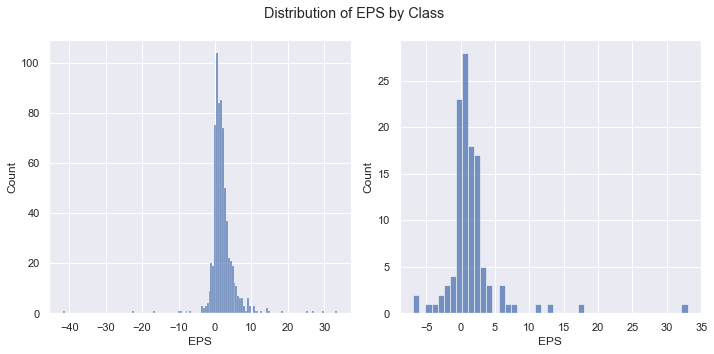

In [90]:
# Visualisations for comparison
fig, axes = plt.subplots(1,2,sharey = False, sharex = False, figsize = (10,5))
fig.suptitle("Distribution of EPS by Class")

sns.histplot(ax = axes[0], data = fin_gain, x = "EPS")
sns.histplot(ax = axes[1], data = fin_loss, x = "EPS")

plt.tight_layout()
plt.show()

In [91]:
fin_gain_eps = fin_gain["EPS"]
fin_loss_eps = fin_loss["EPS"]

In [92]:
# Cohen's function to determint effect size | code courtesy of machinelearningmastery.com
def cohend(d1, d2):
    
    n1 = len(d1)
    n2 = len(d2)
    
    s1 = d1.var()
    s2 = d2.var()
    
    # Calculating pooled standard deviation
    s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    
    u1 = d1.mean()
    u2 = d2.mean()
    
    return (u1 - u2)/s

In [93]:
cohend(fin_gain_eps, fin_loss_eps)

0.12689664922497312

Here we see that there is little effect of EPS on price variability. We will now create a new variable called "Tier" which will segment the companies according to the characteristics mentioned in <b>NOTE</b> above.

In [94]:
fin4["Tier"] = fin4.apply(lambda x: 1 if x["Class"] == 0 and x["EPS"] <= 0 else 2 if x["Class"] == 1 and x["EPS"] > 0 else 3 if x["Class"] == 1 and x["EPS"] <= 0 else 4, axis = 1)

In [95]:
fin4["Tier"].value_counts()/fin4.shape[0]

2    0.738761
3    0.120292
4    0.104496
1    0.036452
Name: Tier, dtype: float64

<b>3.3.3. Findings</b>

We can now combine our results to answer the second research question given by:

In [96]:
rq["RQ22"]

'To what extent does EPS affect price variation and how can companies be segmented according to the relationship between the two?'

<b>To what extent does EPS affect price variation?</b>

Cohen's d = 0.13 | This implies that there is little to no effect.

<b>How can companies be segmented according to this relationship?</b>

This has been done in <b>NOTE</b> above.

## 4. Healthcare Companies

<b>NOTE: </b>The majority of this segment will closely resemble that done in Section 3. Therefore, we will not be as explicit with our explanations for the code in this section. It may benefit the reader to simply skip to sections <b>4.2.3.</b> and <b>4.3.3.</b> to observe the findings for research questions 1 and 2, respectively. 

### 4.1. Data Preparation and Exploration

In [97]:
health.shape

(691, 186)

In [98]:
health.head()

Revenue  Revenue Growth  Cost of Revenue  Gross Profit  SG&A Expense  \
29  5.364700e+10          0.0210     1.124800e+10  4.239900e+10  1.445500e+10   
41  2.256100e+10          0.0859     6.547000e+09  1.601400e+10  4.551000e+09   
44  1.066000e+06          0.0009     0.000000e+00  1.066000e+06  1.870700e+07   
51  2.212700e+10         -0.1524     4.853000e+09  1.727400e+10  4.056000e+09   
65  3.275300e+10          0.1608     7.718000e+09  2.503500e+10  7.399000e+09   

    Operating Expenses  Operating Income  Interest Expense  \
29        3.051400e+10      1.188500e+10      0.000000e+00   
41        1.004600e+10      5.968000e+09      0.000000e+00   
44        3.083300e+07     -2.976700e+07      0.000000e+00   
51        9.074000e+09      8.200000e+09      1.077000e+09   
65        1.865200e+10      6.383000e+09      1.144000e+09   

    Earnings before Tax  Income Tax Expense  ...  Receivables growth  \
29         1.185900e+10        7.060000e+08  ...             -0.0238   
41         5.941000e+09        1.021000e+09  ...             -0.0532   
44        -2.701700e+07        0.000000e+00  ...              1.6789   
51         7.794000e+09        2.339000e+09  ...             -0.1361   
65         5.197000e+09       -4.900000e+08  ...              0.0582   

    Inventory Growth  Asset Growth  Book Value per Share Growth  Debt Growth  \
29           -0.0092       -0.0720                      -0.0959      -0.0403   
41            0.0249        0.0428                       0.1982      -0.0770   
44            0.0000        0.6796                       0.5445       0.0000   
51            0.0162       -0.0940                       0.0535      -0.1854   
65            0.0000       -0.1615                      -2.7160       0.0787   

    R&D Expense Growth  SG&A Expenses Growth      Sector  Price_Var  Class  
29              0.0420               -0.0236  Healthcare  -6.046940      0  
41             -0.0211               -0.0421  Healthcare  26.641748      1  
44              0.2174               -0.0301  Healthcare  30.769237      1  
51              0.3439                0.0459  Healthcare   6.367175      1  
65              1.0629                0.1754  Healthcare   4.834144      1  

[5 rows x 186 columns]

In [99]:
health = health.drop("Sector", axis = 1)

<b>4.1.1. Missing Value Treatment</b>

In [100]:
# Dropping features with more than 20% missing values
threshold = 0.8 * health.shape[0]
health2 = health.dropna(thresh = threshold, axis = 1)

# Updating history
df_history["heatlh2"] = "Healthcare companies dataframe with missing columns removed"

In [101]:
# Imputing remaining missing values using knn imputation
imputer = KNNImputer()
imputer.fit(health2)

health3 = pd.DataFrame(imputer.transform(health2), columns = health2.columns)

# Updating history
df_history["health3"] = "Healthcare companies with no missing values"

In [102]:
# Updating segments
health3_cols = health3.columns.tolist()

health_assets = [x for x in health3_cols if x in assets2]
health_liabilities = [x for x in health3_cols if x in liabilities2]
health_equity = [x for x in health3_cols if x in equity2]
health_income = [x for x in health3_cols if x in income2]
health_expenses = [x for x in health3_cols if x in expenses2]
health_cash_flows = [x for x in health3_cols if x in cash_flows2]
health_ratios = [x for x in health3_cols if x in ratios2]
health_per_share = [x for x in health3_cols if x in per_share2]
health_growth = [x for x in health3_cols if x in growth2]
health_other = [x for x in health3_cols if x in other2]

In [103]:
len(health_assets) + len(health_liabilities) + len(health_equity) + len(health_income) + len(health_expenses) + len(health_cash_flows) + len(health_ratios) + len(health_per_share) + len(health_growth) + len(health_other)

160

<b>4.1.2. Target Variable Analysis</b>

<b>Class</b>

In [104]:
# Observing class distribution
health3["Class"].value_counts()/health3.shape[0]

1.0    0.525326
0.0    0.474674
Name: Class, dtype: float64

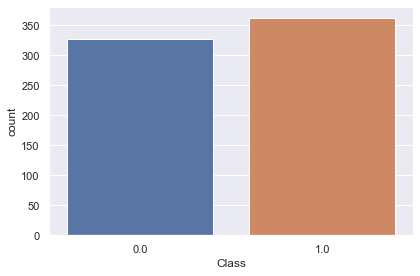

In [105]:
# Visualising distribution of classes
sns.countplot(data = health3, x = "Class")
plt.tight_layout()
plt.show()

<b>Price_Var</b>

In [106]:
# Statistical summaries
health3["Price_Var"].describe()

count     691.000000
mean       25.980867
std       169.897668
min       -98.997050
25%       -31.604369
50%         3.636356
75%        48.549035
max      3756.716345
Name: Price_Var, dtype: float64

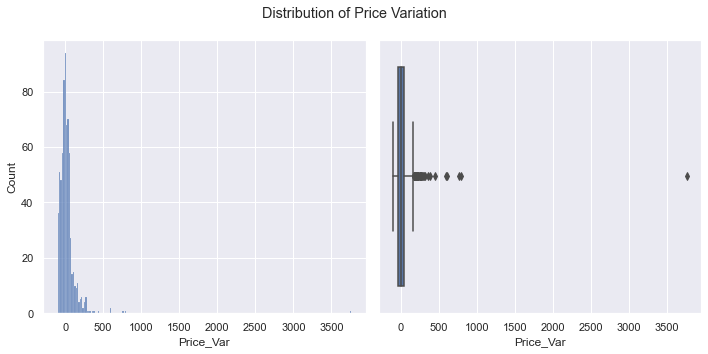

In [107]:
# Visualisations
fig, axes = plt.subplots(1,2,sharey = False, sharex = False, figsize = (10,5))
fig.suptitle("Distribution of Price Variation")

sns.histplot(ax = axes[0], data = health3, x = "Price_Var")
sns.boxplot(ax = axes[1], data = health3, x = "Price_Var")

plt.tight_layout()
plt.show()

This maximum and upper values raise concerns. They will be removed.

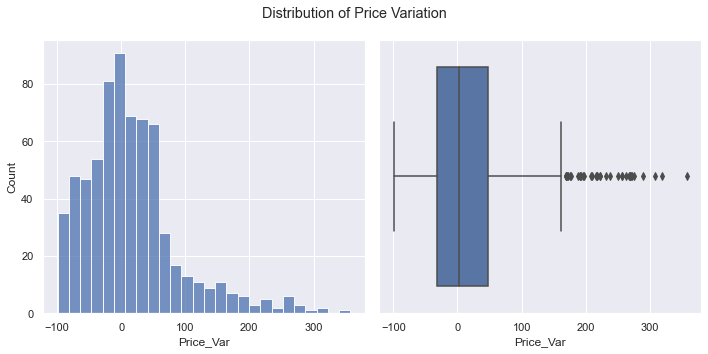

In [108]:
price_var_upper = health3["Price_Var"].quantile(0.99)
price_var_upper_idx = health3[health3["Price_Var"] > price_var_upper].index

# Dropping outliers
health4 = health3.drop(price_var_upper_idx, axis = 0)

# Updating dataframe
df_history["health4"] = "Healthcare dataset without price variation outliers"

# Visualisations
fig, axes = plt.subplots(1,2,sharey = False, sharex = False, figsize = (10,5))
fig.suptitle("Distribution of Price Variation")

sns.histplot(ax = axes[0], data = health4, x = "Price_Var")
sns.boxplot(ax = axes[1], data = health4, x = "Price_Var")

plt.tight_layout()
plt.show()

<b>EPS</b>

In [109]:
# Statistical summaries
health4["EPS"].describe()

count      684.000000
mean       -74.303828
std       1569.994363
min     -40068.000000
25%         -2.342500
50%         -0.865000
75%          0.132600
max         22.650000
Name: EPS, dtype: float64

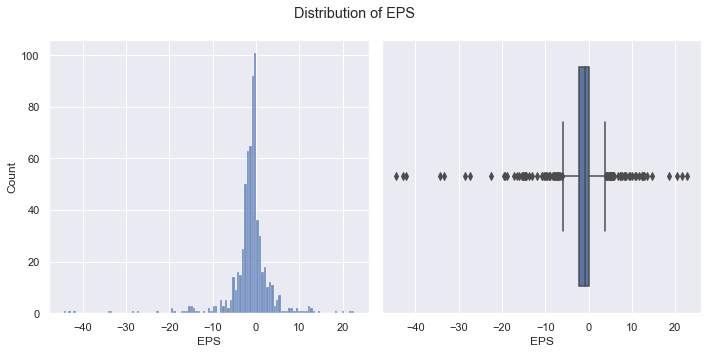

In [110]:
eps_lower = health4["EPS"].quantile(0.01)
eps_lower_idx = health4[health4["EPS"] < eps_lower].index

health5 = health4.drop(eps_lower_idx, axis = 0)

# Updating history
df_history["health5"] = "Healthcare companies with EPS outliers removed"

# Visualisations
fig, axes = plt.subplots(1,2,sharey = False, sharex = False, figsize = (10,5))
fig.suptitle("Distribution of EPS")

sns.histplot(ax = axes[0], data = health5, x = "EPS")
sns.boxplot(ax = axes[1], data = health5, x = "EPS")

plt.tight_layout()
plt.show()

### 4.2. Research Question 1

<b>4.2.1. Feature Selection</b>

<b>Assets</b>

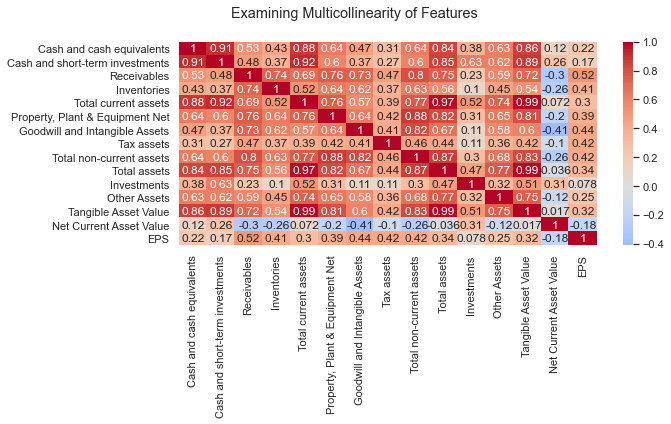

In [111]:
health_assets.append("EPS")
h_assets = health5[health_assets]
df_history["h_assets"] = "Healthcare assets dataframe"

# Examining correlations between features - using spearman rank due to robustness to outliers
corr = h_assets.corr(method = 'spearman')
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(corr, center = 0, cmap = "coolwarm", annot = True)
plt.suptitle("Examining Multicollinearity of Features")
plt.tight_layout()
plt.show()

Variables chosen are:

* <b>Receivables</b>
* <b>Goodwill and Intangible Assets</b>
* <b>Total assets</b>

<b>Liabilities</b>

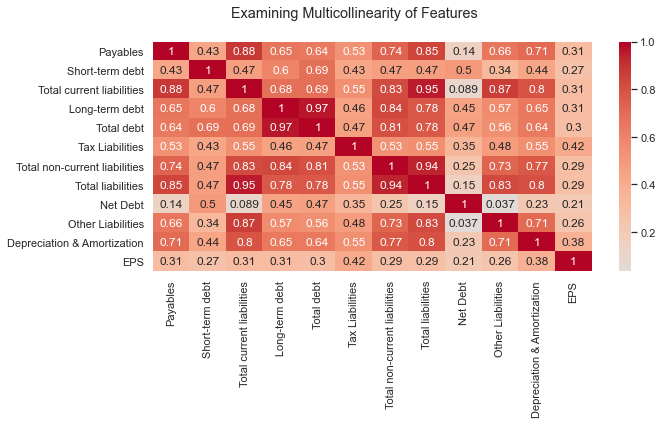

In [112]:
health_liabilities.append("EPS")
h_liabilities = health5[health_liabilities]
df_history["h_liabilities"] = "Healthcare liabilities dataframe"

# Examining correlations between features - using spearman rank due to robustness to outliers
corr = h_liabilities.corr(method = 'spearman')
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(corr, center = 0, cmap = "coolwarm", annot = True)
plt.suptitle("Examining Multicollinearity of Features")
plt.tight_layout()
plt.show()

Variables chosen are:

* <b>Tax Liabilities</b>
* <b>Depreciation & Amorization</b>

<b>Equity</b>

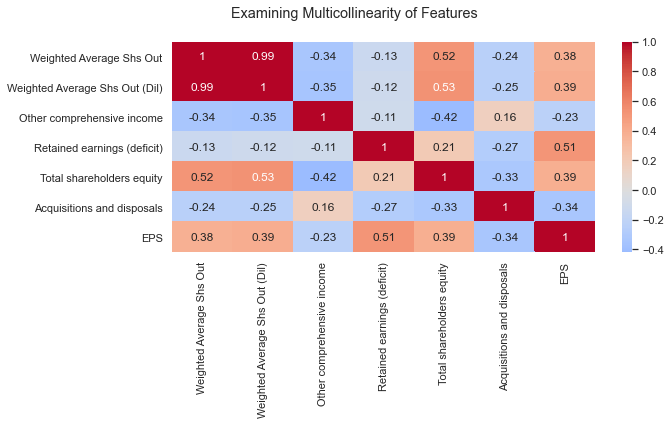

In [113]:
health_equity.append("EPS")
h_equity = health5[health_equity]
df_history["h_equity"] = "Healthcare equity dataframe"

# Examining correlations between features - using spearman rank due to robustness to outliers
corr = h_equity.corr(method = 'spearman')
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(corr, center = 0, cmap = "coolwarm", annot = True)
plt.suptitle("Examining Multicollinearity of Features")
plt.tight_layout()
plt.show()

Variables chosen is <b>Retained earnings (deficit)</b>.

<b>Income</b>

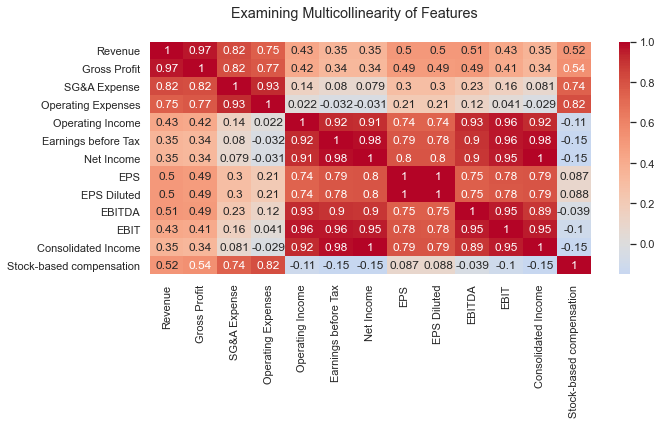

In [114]:
h_income = health5[health_income]
df_history["h_income"] = "Healthcare income dataframe"

# Examining correlations between features - using spearman rank due to robustness to outliers
corr = h_income.corr(method = 'spearman')
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(corr, center = 0, cmap = "coolwarm", annot = True)
plt.suptitle("Examining Multicollinearity of Features")
plt.tight_layout()
plt.show()

Variables chosen are:

* <b>Net Income</b>
* <b>Revenue</b>

<b>Expenses</b>

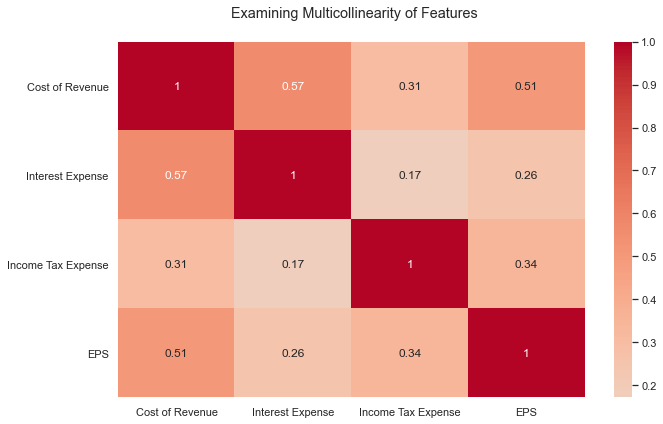

In [115]:
health_expenses.append("EPS")
h_expenses = health5[health_expenses]
df_history["h_expenses"] = "Healthcare expenses dataframe"

# Examining correlations between features - using spearman rank due to robustness to outliers
corr = h_expenses.corr(method = 'spearman')
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(corr, center = 0, cmap = "coolwarm", annot = True)
plt.suptitle("Examining Multicollinearity of Features")
plt.tight_layout()
plt.show()

Variable chosen is <b>Cost of Revenue</b>.

<b>Cash Flows</b>

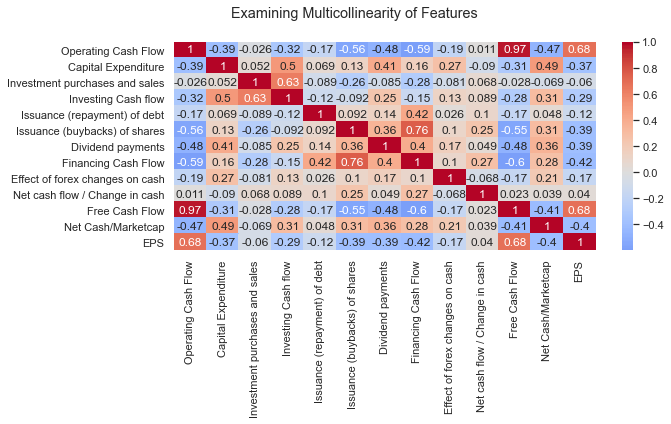

In [116]:
health_cash_flows.append("EPS")
h_cash_flows = health5[health_cash_flows]
df_history["h_cash_flows"] = "Healthcare cash flow dataframe"

# Examining correlations between features - using spearman rank due to robustness to outliers
corr = h_cash_flows.corr(method = 'spearman')
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(corr, center = 0, cmap = "coolwarm", annot = True)
plt.suptitle("Examining Multicollinearity of Features")
plt.tight_layout()
plt.show()

Variable chosen is <b>Operating Cash Flow</b>.

<b>Ratios</b>

In [117]:
len(health_ratios)

44

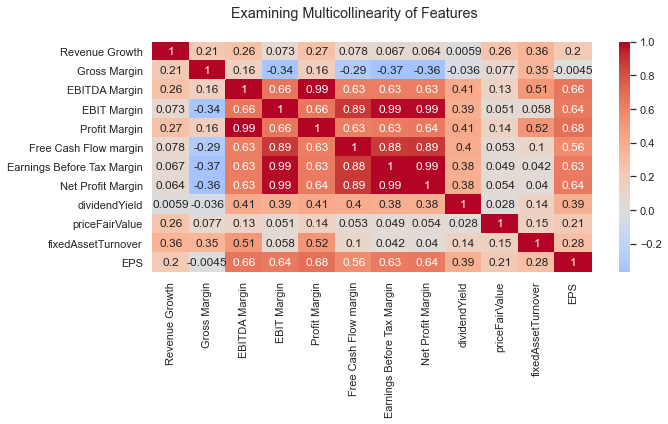

In [118]:
health_ratios1 = health_ratios[0:11]
health_ratios1.append("EPS")

h_ratios1 = health5[health_ratios1]
df_history["h_ratios1"] = "Healthcare ratios 1"

# Examining correlations between features - using spearman rank due to robustness to outliers
corr = h_ratios1.corr(method = 'spearman')
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(corr, center = 0, cmap = "coolwarm", annot = True)
plt.suptitle("Examining Multicollinearity of Features")
plt.tight_layout()
plt.show()

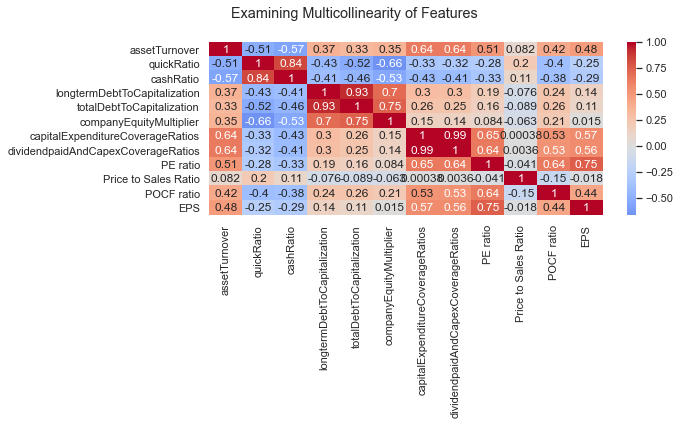

In [119]:
health_ratios2 = health_ratios[11:22]
health_ratios2.append("EPS")

h_ratios2 = health5[health_ratios2]
df_history["h_ratios2"] = "Healthcare ratios 2"

# Examining correlations between features - using spearman rank due to robustness to outliers
corr = h_ratios2.corr(method = 'spearman')
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(corr, center = 0, cmap = "coolwarm", annot = True)
plt.suptitle("Examining Multicollinearity of Features")
plt.tight_layout()
plt.show()

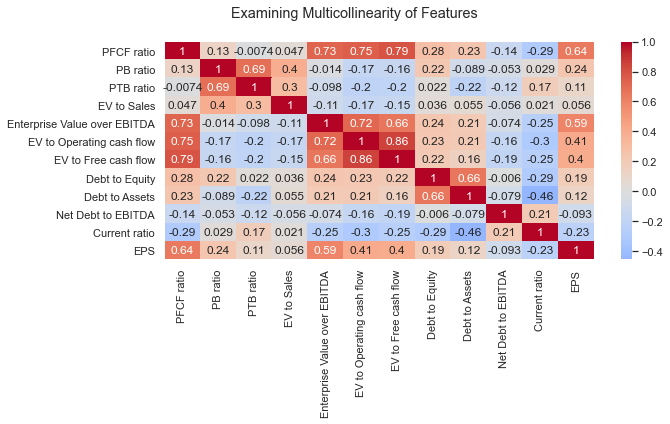

In [120]:
health_ratios3 = health_ratios[22:33]
health_ratios3.append("EPS")

h_ratios3 = health5[health_ratios3]
df_history["h_ratios3"] = "Healthcare ratios 3"

# Examining correlations between features - using spearman rank due to robustness to outliers
corr = h_ratios3.corr(method = 'spearman')
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(corr, center = 0, cmap = "coolwarm", annot = True)
plt.suptitle("Examining Multicollinearity of Features")
plt.tight_layout()
plt.show()

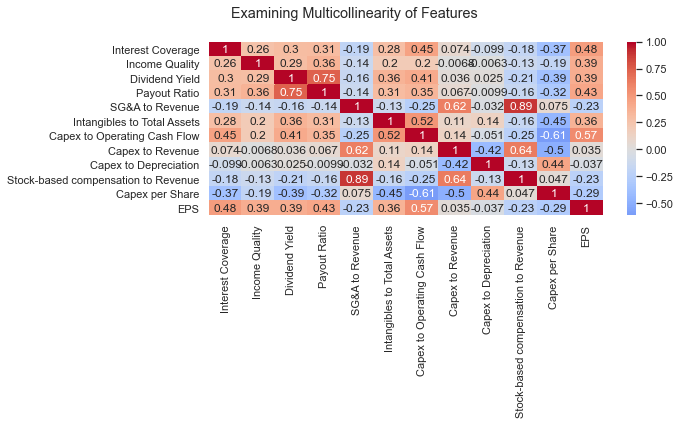

In [121]:
health_ratios4 = health_ratios[33:]
health_ratios4.append("EPS")

h_ratios4 = health5[health_ratios4]
df_history["h_ratios4"] = "Healthcare ratios 4"

# Examining correlations between features - using spearman rank due to robustness to outliers
corr = h_ratios4.corr(method = 'spearman')
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(corr, center = 0, cmap = "coolwarm", annot = True)
plt.suptitle("Examining Multicollinearity of Features")
plt.tight_layout()
plt.show()

Variables chosen are:

* <b>Profit Margin</b>
* <b>assetTurnover</b>
* <b>PE ratio</b>
* <b>Enterprise Value over EBITDA</b>
* <b>Capex to Operating Cash Flow</b>
* <b>Interest Coverage</b>

<b>Per Share</b>

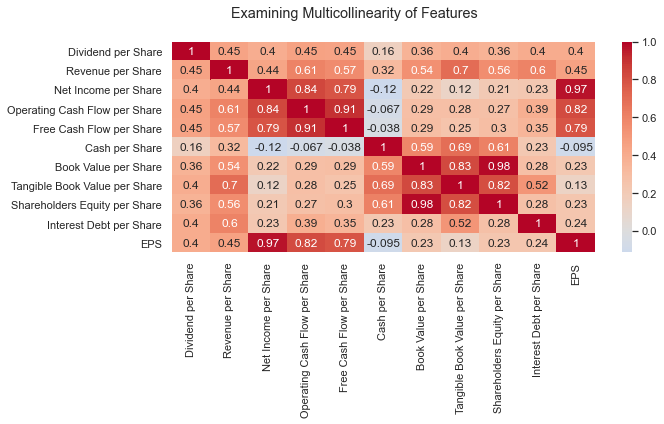

In [122]:
health_per_share1 = health_per_share[0:10]
health_per_share1.append("EPS")

h_per_share1 = health5[health_per_share1]
df_history["h_per_share1"] = "Healthcare per share 1"

# Examining correlations between features - using spearman rank due to robustness to outliers
corr = h_per_share1.corr(method = 'spearman')
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(corr, center = 0, cmap = "coolwarm", annot = True)
plt.suptitle("Examining Multicollinearity of Features")
plt.tight_layout()
plt.show()

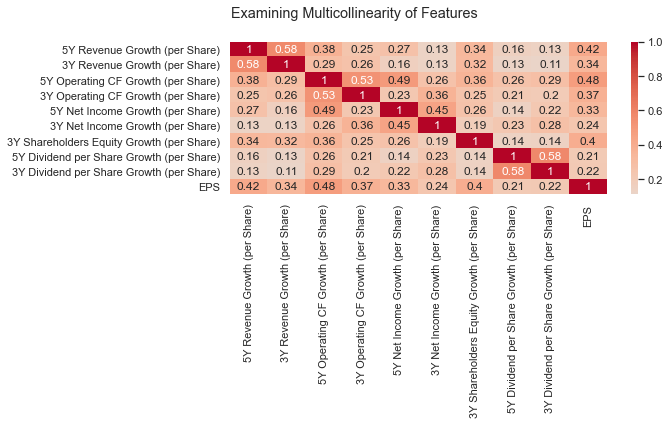

In [123]:
health_per_share2 = health_per_share[10:]
health_per_share2.append("EPS")

h_per_share2 = health5[health_per_share2]
df_history["h_per_share2"] = "Healthcare per share 2"

# Examining correlations between features - using spearman rank due to robustness to outliers
corr = h_per_share2.corr(method = 'spearman')
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(corr, center = 0, cmap = "coolwarm", annot = True)
plt.suptitle("Examining Multicollinearity of Features")
plt.tight_layout()
plt.show()

Variable chosen is <b>Net Income per Share</b>.

<b>Growth</b>

In [124]:
len(health_growth)

17

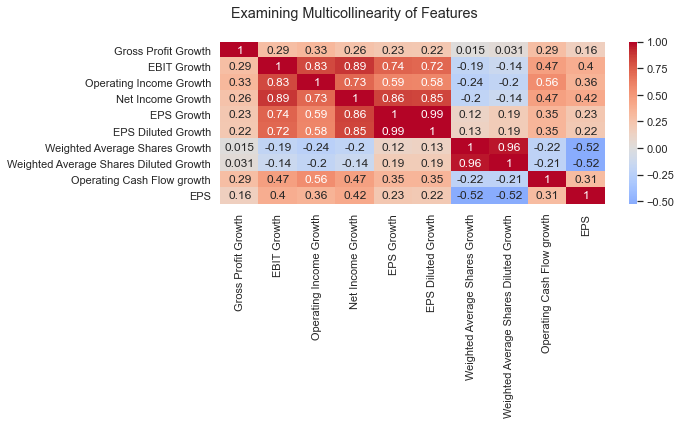

In [125]:
health_growth1 = health_growth[0:9]
health_growth1.append("EPS")

h_growth1 = health5[health_growth1]
df_history["h_growth1"] = "Healthcare growth 1"

# Examining correlations between features - using spearman rank due to robustness to outliers
corr = h_growth1.corr(method = 'spearman')
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(corr, center = 0, cmap = "coolwarm", annot = True)
plt.suptitle("Examining Multicollinearity of Features")
plt.tight_layout()
plt.show()

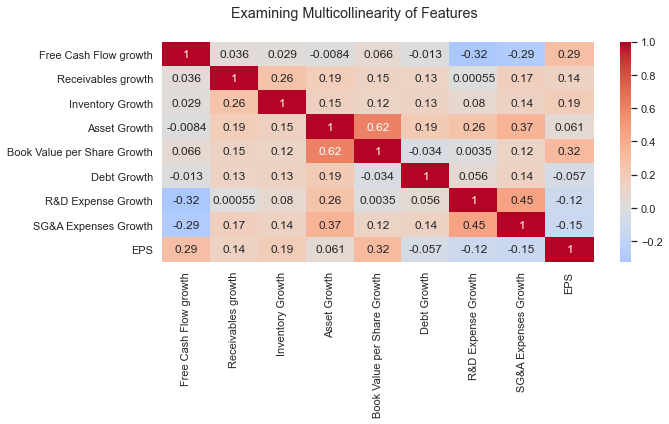

In [126]:
health_growth2 = health_growth[9:]
health_growth2.append("EPS")

h_growth2 = health5[health_growth2]
df_history["h_growth2"] = "Healthcare growth 2"

# Examining correlations between features - using spearman rank due to robustness to outliers
corr = h_growth2.corr(method = 'spearman')
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(corr, center = 0, cmap = "coolwarm", annot = True)
plt.suptitle("Examining Multicollinearity of Features")
plt.tight_layout()
plt.show()

Variable chosen is <b>Net Income Growth</b>.

<b>Other</b>

In [127]:
len(health_other)

21

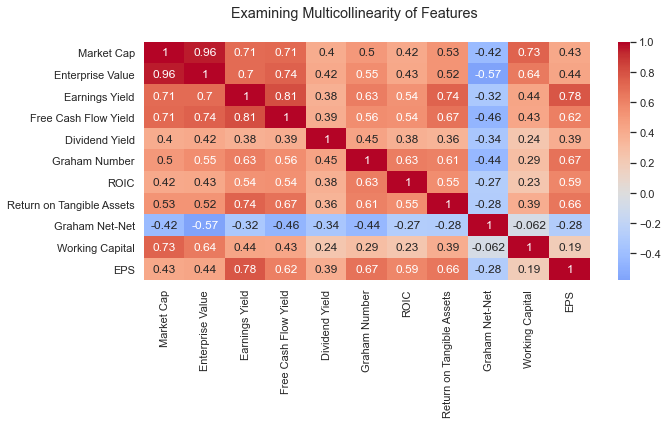

In [128]:
health_other1 = health_other[0:10]
health_other1.append("EPS")

h_other1 = health5[health_other1]
df_history["h_other1"] = "Healthcare other 1"

# Examining correlations between features - using spearman rank due to robustness to outliers
corr = h_other1.corr(method = 'spearman')
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(corr, center = 0, cmap = "coolwarm", annot = True)
plt.suptitle("Examining Multicollinearity of Features")
plt.tight_layout()
plt.show()

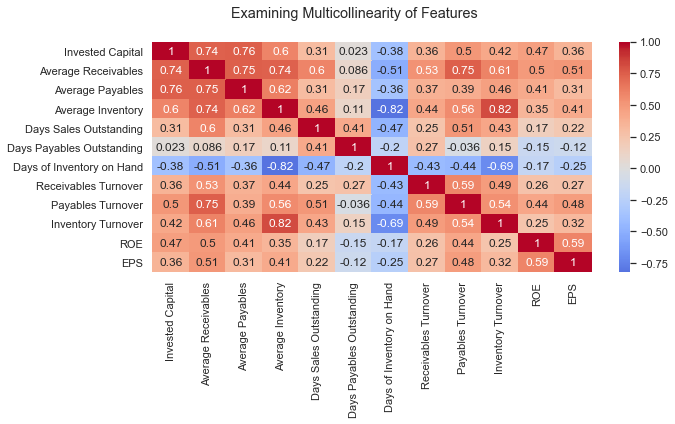

In [129]:
health_other2 = health_other[10:]
health_other2.append("EPS")

h_other2 = health5[health_other2]
df_history["h_other2"] = "Healthcare other 2"

# Examining correlations between features - using spearman rank due to robustness to outliers
corr = h_other2.corr(method = 'spearman')
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(corr, center = 0, cmap = "coolwarm", annot = True)
plt.suptitle("Examining Multicollinearity of Features")
plt.tight_layout()
plt.show()

Variables chosen are:

* <b>Earnings Yield</b>
* <b>ROE</b>

<b>Creating new dataframe with important features</b>

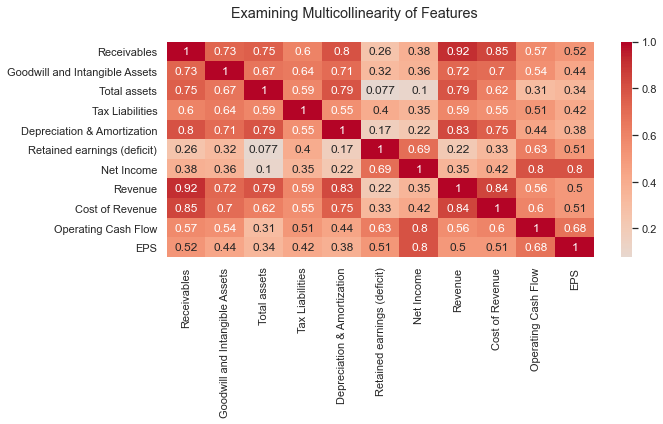

In [130]:
feat1 = ["Receivables", "Goodwill and Intangible Assets", "Total assets", "Tax Liabilities", "Depreciation & Amortization",
        "Retained earnings (deficit)", "Net Income", "Revenue", "Cost of Revenue", "Operating Cash Flow", "EPS"]

health6 = health5[feat1]
df_history["health6"] = "Healthcare Companies with important features 1"

# Examining correlations between features - using spearman rank due to robustness to outliers
corr = health6.corr(method = 'spearman')
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(corr, center = 0, cmap = "coolwarm", annot = True)
plt.suptitle("Examining Multicollinearity of Features")
plt.tight_layout()
plt.show()


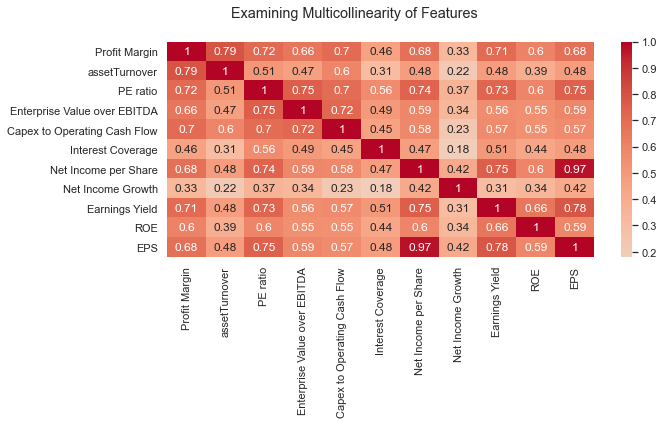

In [131]:
feat2 = ["Profit Margin","assetTurnover","PE ratio","Enterprise Value over EBITDA", "Capex to Operating Cash Flow",
          "Interest Coverage", "Net Income per Share", "Net Income Growth","Earnings Yield","ROE","EPS"]

health7 = health5[feat2]
df_history["health7"] = "Healthcare Companies with important features 2"

# Examining correlations between features - using spearman rank due to robustness to outliers
corr = health7.corr(method = 'spearman')
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(corr, center = 0, cmap = "coolwarm", annot = True)
plt.suptitle("Examining Multicollinearity of Features")
plt.tight_layout()
plt.show()

<b>Removing highly correlated features</b>

In [132]:
feat3 = ["Net Income", "Receivables", "Net Income per Share", "Profit Margin", "EPS"]
health8 = health5[feat3]
df_history["health8"] = "Healthcare companies with collinear variables removed"

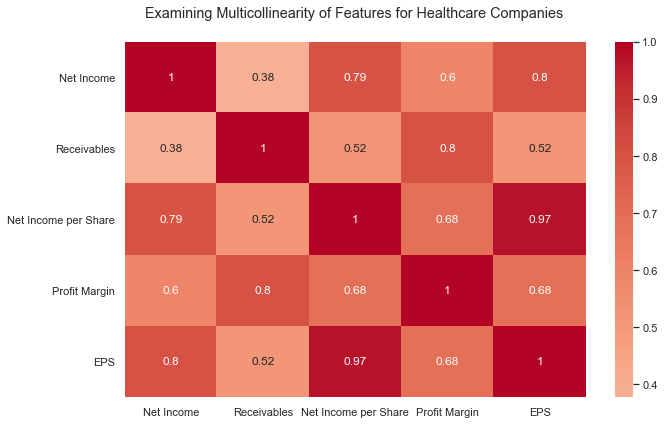

In [133]:
# Examining correlations between features - using spearman rank due to robustness to outliers
corr = health8.corr(method = 'spearman')
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(corr, center = 0, cmap = "coolwarm", annot = True)
plt.suptitle("Examining Multicollinearity of Features for Healthcare Companies")
plt.tight_layout()
plt.show()

<b>4.2.2. Model Building</b>

<b>Building Random Forest Model</b>

In [134]:
X = health8.drop("EPS", axis = 1)
y = health8["EPS"]

In [135]:
#Separating training and test sets
X_train, X_test, y_train, y_test = train_test_split(pd.get_dummies(X), y, test_size = 0.3, random_state = 1)

In [136]:
#Build Model
rf = RandomForestRegressor(oob_score = True, random_state = 1)

In [137]:
#Grid Search
model = GridSearchCV(rf, param_grid = {"n_estimators": [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150], "max_features":[3]}, n_jobs = -1)
model.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(oob_score=True, random_state=1),
             n_jobs=-1,
             param_grid={'max_features': [3],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100, 110, 120, 130, 140, 150]})

In [138]:
best_model = model.best_estimator_
print(best_model.oob_score_)
print(best_model.score(X_test, y_test))

0.72730158675598
0.876430047467732


In [139]:
pd.Series(best_model.feature_importances_, index = X_test.columns).sort_values(ascending = False)

Net Income per Share    0.762728
Net Income              0.161497
Profit Margin           0.041002
Receivables             0.034773
dtype: float64

<b>4.2.3. Findings</b>

<b>Primary determinants of EPS</b>

Results from feature selection indicate that these components are given by:

* <b>Net Income</b>
* <b>Receivables</b>
* <b>Net Income per Share</b>
* <b>Profit Margin</b>

<b>To what extent do they determine EPS?</b>

Results from the model suggest that 87% of the variance in EPS can be explained by a combination of the features above. 

### 4.3. Research Question 2

<b>4.3.1. Investigating Relationships</b>

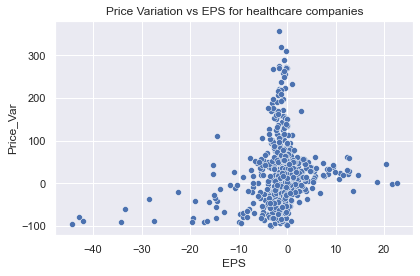

In [140]:
sns.scatterplot(data = health5, y = "Price_Var", x = "EPS")
plt.title("Price Variation vs EPS for healthcare companies")
plt.tight_layout()
plt.show()

In [141]:
health_gain = health5.query("Class == 1")
print(health_gain.shape[0])
health_loss = health5.query("Class == 0")
print(health_loss.shape[0])

356
321


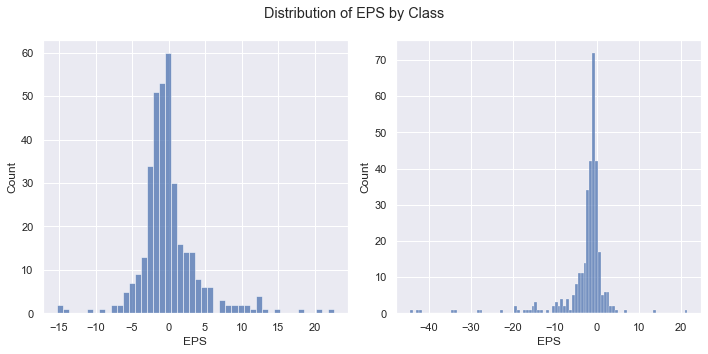

In [142]:
# Visualisations for comparison
fig, axes = plt.subplots(1,2,sharey = False, sharex = False, figsize = (10,5))
fig.suptitle("Distribution of EPS by Class")

sns.histplot(ax = axes[0], data = health_gain, x = "EPS")
sns.histplot(ax = axes[1], data = health_loss, x = "EPS")

plt.tight_layout()
plt.show()

<b>4.3.2. Investigating Effect Size</b>

In [143]:
health_gain_eps = health_gain["EPS"]
health_loss_eps = health_loss["EPS"]

In [144]:
cohend(health_gain_eps, health_loss_eps)

0.5227121470128612

In [145]:
health5["Tier"] = health5.apply(lambda x: 1 if x["Class"] == 0 and x["EPS"] <= 0 else 2 if x["Class"] == 1 and x["EPS"] > 0 else 3 if x["Class"] == 1 and x["EPS"] <= 0 else 4, axis = 1)

In [146]:
health5["Tier"].value_counts()/health5.shape[0]

1    0.404727
3    0.324963
2    0.200886
4    0.069424
Name: Tier, dtype: float64

<b>4.3.3. Findings</b>

<b>To what extent does EPS affect price variation?</b>

Cohen's d = 0.52 | This implies that there is a medium effect size.

<b>How can companies be segmented according to this relationship?</b>

See <b>NOTE</b> in Section <b>3.3</b>.